# Zipline Coding Exercises

In this notebook you will create your own pipeline and create custom factors and filters for it. 

### Install Packages

In [1]:
!sed -Ei 's/^# deb-src /deb-src /' /etc/apt/sources.list 
!apt-get update 
!apt-get install libhdf5-dev -y

Hit:1 http://archive.ubuntu.com/ubuntu xenial InRelease
Get:2 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [99.8 kB]      
Get:3 http://security.ubuntu.com/ubuntu xenial-security InRelease [99.8 kB]    
Get:4 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu xenial InRelease [23.8 kB]
Get:6 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [97.4 kB]    
Get:7 http://archive.canonical.com/ubuntu xenial InRelease [11.5 kB]           
Get:8 https://cli-assets.heroku.com/apt ./ InRelease [2,879 B]                 
Hit:9 https://deb.nodesource.com/node_11.x xenial InRelease
Get:10 http://archive.ubuntu.com/ubuntu xenial/main Sources [1,103 kB]
Get:11 http://archive.ubuntu.com/ubuntu xenial/restricted Sources [5,179 B]
Get:12 http://archive.ubuntu.com/ubuntu xenial/universe Sources [9,802 kB]
Get:5 https://downloads.apache.org/cassandra/debian 311x InRelease [3,903 B]   
Get:13 http://archive.ubuntu.com/ubuntu xenial/multiverse Sources [215 kB]     
Get:14 http:/

In [2]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 1.3MB 12.9MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   13% |████▍                           | 1.8MB 21.7MB/s eta 0:00:01    37% |████████████                    | 5.1MB 22.4MB/s eta 0:00:01    70% |██████████████████████▍         | 9.4MB 23.8MB/s eta 0:00:01    77% |████████████████████████▉       | 10.4MB 18.2MB/s eta 0:00:01    85% |███████████████████████████▍    | 11.4MB 22.9MB/s eta 0:00:01    93% |██████████████████████████████  | 12.5MB 23.9MB/s eta 0:00:01
    100% |████████████████████████████████| 2.5MB 12.3MB/s ta 0:00:01    48% |███████████████▋                | 1.2MB 22.2MB/s eta 0:00:01    94% |██████████████████████████████▍ | 2.3MB 23.5MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 12.7MB/s ta 0:00:01
    100% |████████████████████████████████| 26.3MB 1.4MB/s eta 0:00:01   14% |████▊                           | 3.9MB 23.1MB/s eta 0:00:01    18% |██████             

    100% |████████████████████████████████| 215kB 15.7MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 8.2MB 4.6MB/s eta 0:00:01    14% |████▊                           | 1.2MB 20.3MB/s eta 0:00:01    38% |████████████▍                   | 3.2MB 21.9MB/s eta 0:00:01    50% |████████████████▎               | 4.2MB 21.2MB/s eta 0:00:01    85% |███████████████████████████▍    | 7.0MB 16.6MB/s eta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 112kB 11.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/a4/d6/67/f303ab028b004bf8e00c05b5b04fba83d8ec238b6547becdb7
  Running setup.py bdist_wheel for Logbook ... done
  Stored in directory: /root/.cache/pip/wheels/d2/70/07/68b99a8e05dcd1ab194a8e0ccb9e4d0ac5dd6d8d139c7149b4
  Running setup.py bdist_wheel for cyordereddict ... done
  Stored in directory: /root

# Load Data

In [3]:
import os

from zipline.data import bundles
from zipline.data.bundles.csvdir import csvdir_equities


# Specify the bundle name
bundle_name = 'm4-quiz-eod-quotemedia'

# Create an ingest function 
ingest_func = csvdir_equities(['daily'], bundle_name)

# Register the data bundle and its ingest function
bundles.register(bundle_name, ingest_func);

# Set environment variable 'ZIPLINE_ROOT' to the path where the most recent data is located
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '..', '..', 'data', 'module_4_quizzes_eod')

# Load the data bundle
bundle_data = bundles.load(bundle_name)

In [15]:
# import pandas as pd
# x = os.environ['ZIPLINE_ROOT']
# print(x)
# x_f = pd.read_csv(x + '/quotemedia.csv' )

# TODO: Build an Empty Pipeline with a Screen

In the code below create an empty with a screen that filters the pipeline output for stocks with a 60-day average dollar volume greater than \$50,000.

In [33]:
# import resources
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume

# Create a screen for our Pipeline
universe = AverageDollarVolume(window_length = 60) > 50000


# Create an empty Pipeline with the given screen
pipeline = Pipeline(screen = universe)


# TODO: Create a Pipeline Engine

In the code below, create a data loader that loads our data bundle using Zipline's `USEquityPricingLoader`. Then create a function to be passed to the `get_loader` parameter in the pipeline engine. Using the NYSE trading calendar create a pipeline engine using Zipline's `SimplePipelineEngine`

In [34]:
# import resources
from zipline.pipeline.loaders import USEquityPricingLoader

# Set the dataloader
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader)

# Define the function for the get_loader parameter
from zipline.utils.calendars import get_calendar
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.engine import SimplePipelineEngine

def choose_loader(column):
    if column not in USEquityPricing.columns:
        raise Exception('Column not in USEquityPricing')
    return pricing_loader

# Set the trading calendar
trading_calendar = get_calendar('NYSE')

# Create a Pipeline engine
engine = SimplePipelineEngine(get_loader = choose_loader,
                              calendar = trading_calendar.all_sessions,
                              asset_finder = bundle_data.asset_finder)

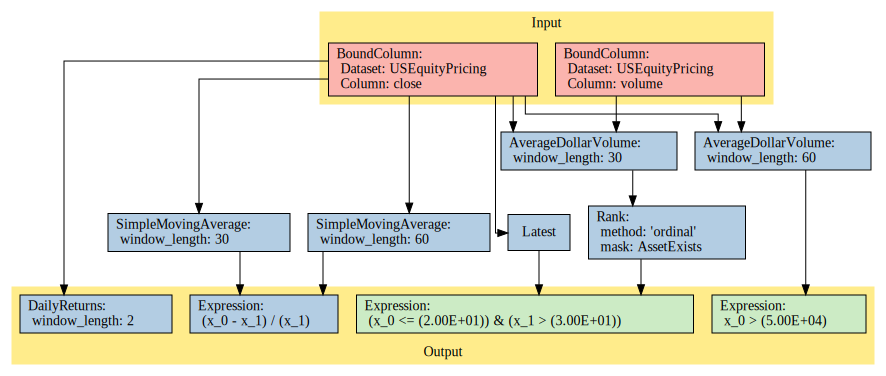

In [38]:
import graphviz

# Render the pipeline as a DAG
pipeline.show_graph()

# TODO: Create Factors and Filters For The Pipeline

### Factors

In the code below, create two factors:

1. **Custom Factor**: Create a custom factor, `percent_difference`,  by combining a 30-day average closing price factor and a 60-average closing price factor. The `percent_difference` factor will calculate the difference between the 30-day and 60-average closing price factors, and will then normalize this difference by the 60-average closing price factor.


2. **Daily Returns Factor**: Create a factor that returns the daily percent change in closing price. To do this, use Zipline's built-in [DailyReturns](https://www.zipline.io/appendix.html#zipline.pipeline.factors.DailyReturns) factor.

Both factors should use the closing prices in the `USEquityPricing`  dataset as inputs. 




### Filters

In the code below, you will create a **Custom Filter**, `tradable_asset`, that returns `True` for the top 20 securities of average dollar volume in a 30 day-window that have a latest closing price above \$30. To do this, you will create two filters first and them combine them. For the first filter, you can use Zipline's built-in factor `AverageDollarVolume()` and its method `.top()` to select the top 20 assets of average dollar volume in a 30 day-window. To get the latest close price of the `USEquityPricing` dataset you can use `USEquityPricing.close.latest`. Finally you can combine these two filters by using the logical operator `&`. 

In [36]:
# import resources
from zipline.pipeline.factors import SimpleMovingAverage
from zipline.pipeline.factors import DailyReturns
from zipline.pipeline.factors import AverageDollarVolume


# class zipline.pipeline.factors.DailyReturns(inputs=sentinel('NotSpecified'), outputs=sentinel('NotSpecified'), window_length=sentinel('NotSpecified'), mask=sentinel('NotSpecified'), dtype=sentinel('NotSpecified'), missing_value=sentinel('NotSpecified'), ndim=sentinel('NotSpecified'), **kwargs)[source]¶



# Create the 30-day average closing price factor
mean_close_30 = SimpleMovingAverage(inputs = [USEquityPricing.close], window_length = 30)


# Create the 60-day average closing price factor
mean_close_60 = SimpleMovingAverage(inputs = [USEquityPricing.close], window_length = 60)


# Create the custom factor
percent_difference = (mean_close_30 - mean_close_60) / mean_close_60


# Create the daily returns factor
daily_returns = DailyReturns(inputs = [USEquityPricing.close])


# Create a filter for the top 20 securities of average dollar volume in a 30 day-window

top20_avg30 = AverageDollarVolume(window_length = 30).top(20)

# Create a filter for the latest closing price above $30
above30 = USEquityPricing.close.latest > 30


# Create a custum filter
custom_filter = top20_avg30 & above30


# TODO: Add Factors and Filters To The Pipeline

In the code below, add the factors and filters you created above to the pipeline

In [37]:
# Add the custom factor to the pipeline
pipeline.add(percent_difference, 'percent difference')


# Add the daily returns factor to the pipeline
pipeline.add(daily_returns, 'daily returns')


# Add the custom filter to the pipeline
pipeline.add(custom_filter, 'top20_avg30')


# TODO: Run The Pipeline

In the code below, run the pipeline for the dates given

In [39]:
# Set starting and end dates
start_date = pd.Timestamp('2014-01-06', tz='utc')
end_date = pd.Timestamp('2016-01-05', tz='utc')

# Run our pipeline for the given start and end dates
output = engine.run_pipeline(pipeline, start_date, end_date)


# Display the pipeline output
output.head()

daily returns  percent difference  \
2014-01-06 00:00:00+00:00 Equity(0 [A])          0.006951            0.025939   
                          Equity(1 [AAL])        0.046523            0.055887   
                          Equity(2 [AAP])        0.028611            0.051009   
                          Equity(3 [AAPL])      -0.021972            0.035906   
                          Equity(4 [ABBV])       0.006147            0.033018   

                                            top20_avg30  
2014-01-06 00:00:00+00:00 Equity(0 [A])           False  
                          Equity(1 [AAL])         False  
                          Equity(2 [AAP])         False  
                          Equity(3 [AAPL])         True  
                          Equity(4 [ABBV])        False

## Solution

[Solution notebook](zipline_coding_exercises_solution.ipynb)